In [99]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# DataPreprocessing


In [100]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D://DeepLearningPractice/BrainDataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=10,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('D://DeepLearningPractice/BrainDataset/test',
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='binary')



Found 202 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


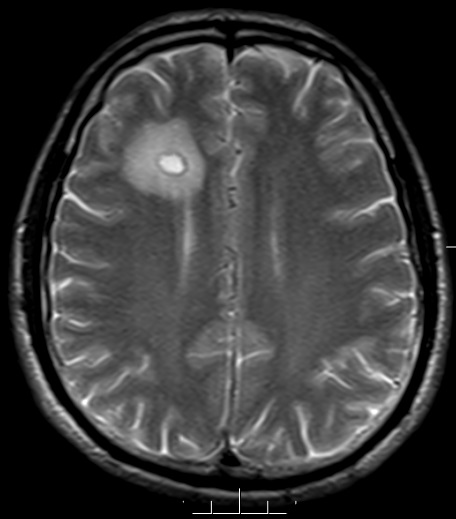

In [101]:
from IPython.display import Image 

pil_img = Image(filename='D://DeepLearningPractice/BrainDataset/test/yes/Y3.jpg')

display(pil_img)

# Callbacks


In [102]:
import tensorflow as tf

DESIRED_ACCURACY = 0.950

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>DESIRED_ACCURACY):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()


# Setting model

In [103]:
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolution layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())


# Step 4 - Full Connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile - SGD, Loss Function, Performance Metric
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()



Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_49 (Dense)             (None, 1)               

# Running model

In [104]:

history=model.fit(training_set,
                        steps_per_epoch=10,
                        epochs=50,
                        batch_size=32,
                        callbacks=[callbacks]
                        )
model.save("braintumor-CNN.h5")

model_json = model.to_json()
with open("model-CNN.json", "w") as json_file:
    json_file.write(model_json)


Epoch 1/50
10/10 [==============================] - 1s 124ms/step - loss: 0.6300 - accuracy: 0.6413
Epoch 2/50
10/10 [==============================] - 1s 134ms/step - loss: 0.5685 - accuracy: 0.7717
Epoch 3/50
10/10 [==============================] - 1s 124ms/step - loss: 0.6641 - accuracy: 0.6600
Epoch 4/50
10/10 [==============================] - 1s 134ms/step - loss: 0.5810 - accuracy: 0.7609
Epoch 5/50
10/10 [==============================] - 1s 144ms/step - loss: 0.5014 - accuracy: 0.8043
Epoch 6/50
10/10 [==============================] - 1s 138ms/step - loss: 0.5199 - accuracy: 0.7600
Epoch 7/50
10/10 [==============================] - 1s 144ms/step - loss: 0.5085 - accuracy: 0.7600
Epoch 8/50
10/10 [==============================] - 1s 143ms/step - loss: 0.4786 - accuracy: 0.7700
Epoch 9/50
10/10 [==============================] - 1s 137ms/step - loss: 0.5248 - accuracy: 0.7717
Epoch 10/50
10/10 [==============================] - 1s 128ms/step - loss: 0.4690 - accuracy: 0.8152

In [105]:
score = model.evaluate(test_set, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7777777910232544


# Model Evaluation

In [106]:
loaded_model = tf.keras.models.load_model('braintumor-CNN.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

(None, 64, 64, 3)

In [107]:
import os
from keras.preprocessing import image

batch_holder = np.zeros((20, 64,64, 3))
img_dir='D://DeepLearningPractice/BrainDataset/test/yes/'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(64,64))
  batch_holder[i, :] = img

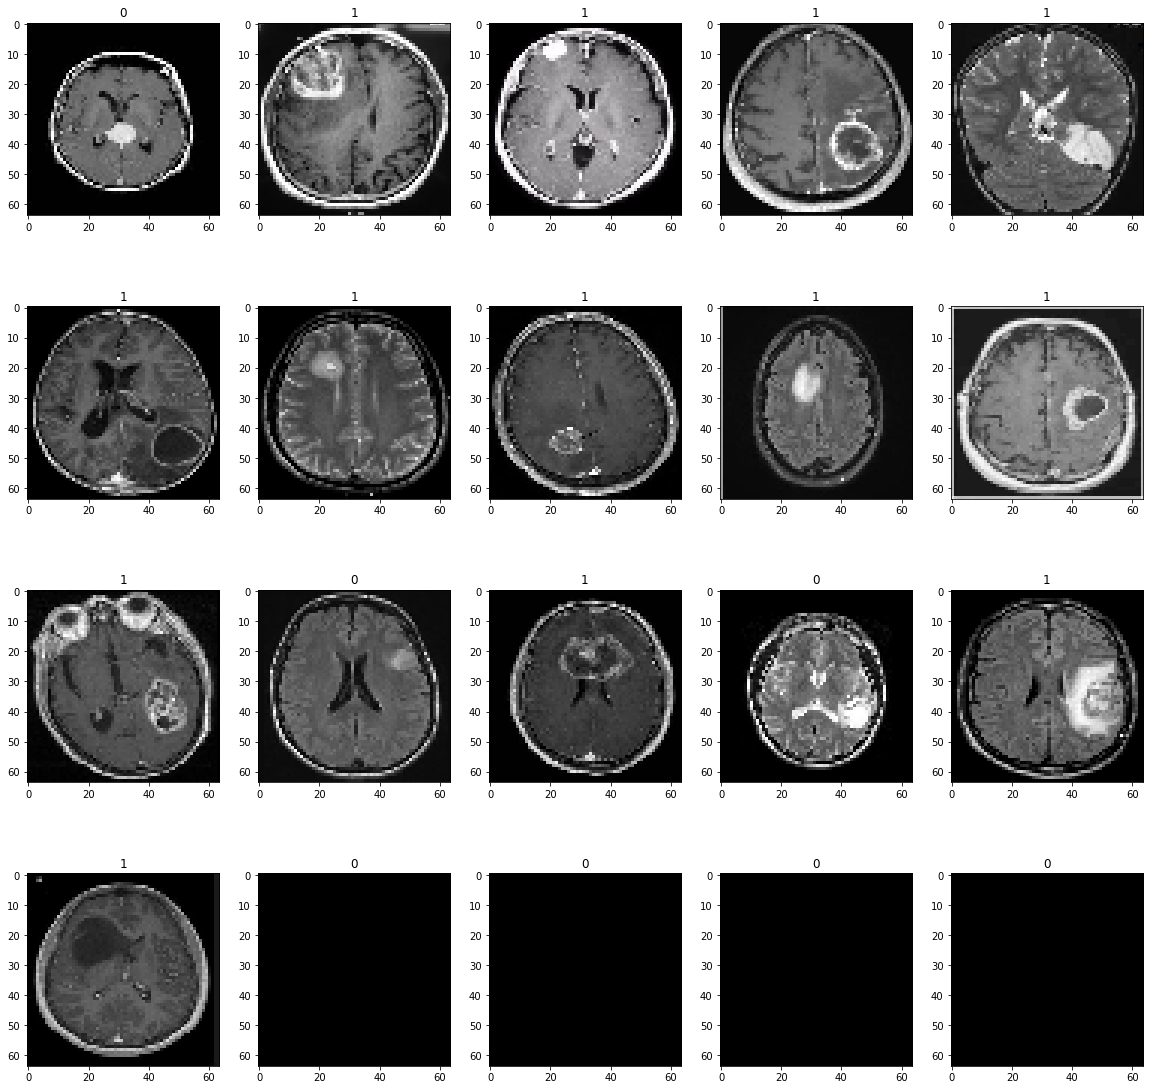

In [108]:
result=loaded_model.predict_classes(batch_holder)

fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(batch_holder):
  fig.add_subplot(4,5, i+1)
  plt.title(result[i][0])
  plt.imshow(img/255.)
  
plt.show()